# Matplotlib

In [52]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random

In [19]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

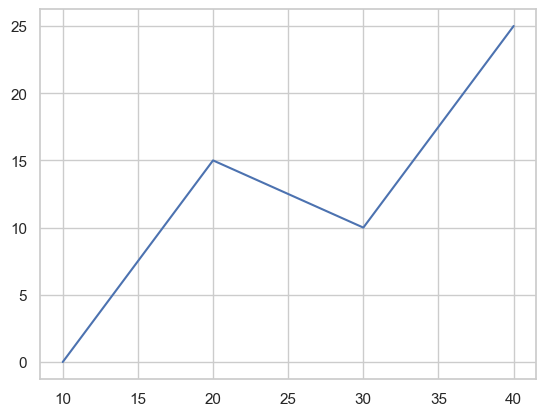

In [20]:
plt.plot(x, y);

# Seaborn

\#1. Seaborn updates `matplotlib`'s rc parameters to improve aesthetics

In [21]:
import seaborn as sns

In [22]:
sns.set() 

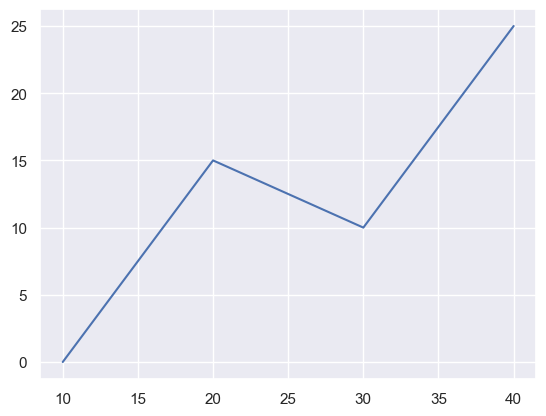

In [23]:
plt.plot(x, y);

In [24]:
sns.set_style("white")

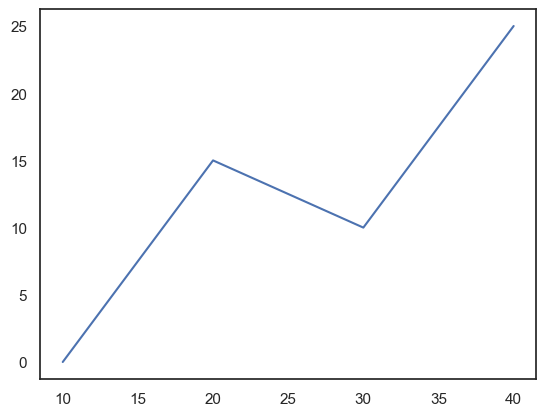

In [25]:
plt.plot(x, y);

#### Versions

In [26]:
import matplotlib
matplotlib.__version__

'3.6.1'

In [27]:
sns.__version__

'0.12.0'

## Seaborn with `pandas`

\#2. Let Seaborn group, aggregate, and plot your `pandas` dataframes

In [28]:
cars = sns.load_dataset('mpg')

In [29]:
type(cars)

pandas.core.frame.DataFrame

In [30]:
cars.dropna(inplace=True)

cars.shape

(392, 9)

In [31]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


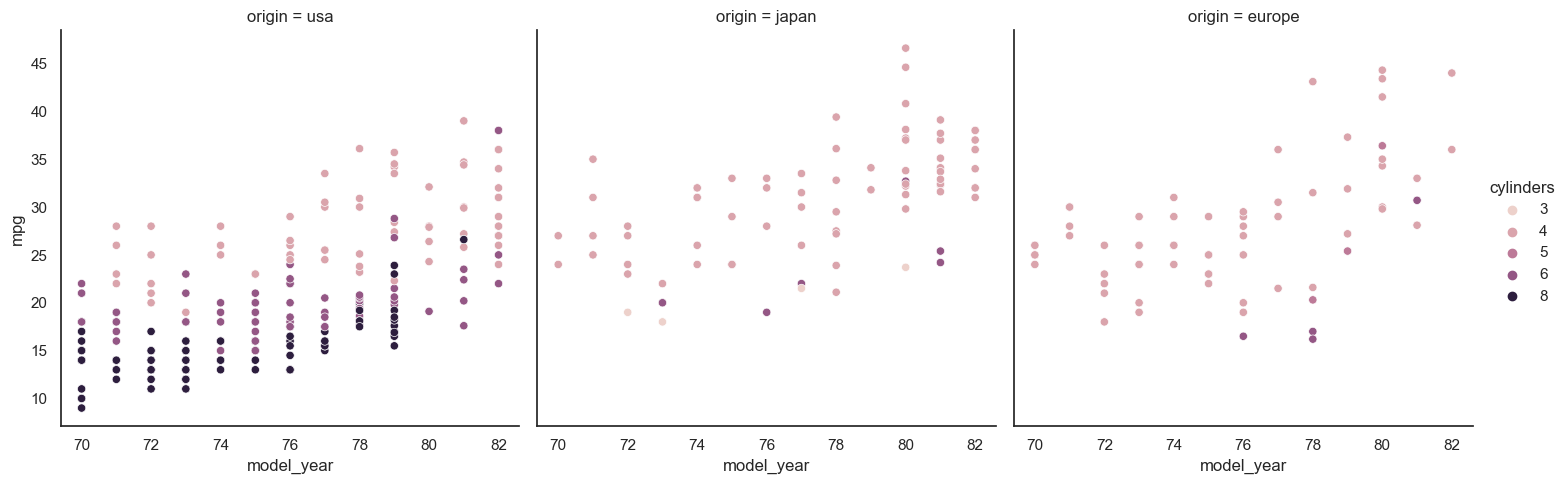

In [32]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', 
            data=cars);

## More Examples

\#3. Seaborn allows for additional plot types and easy plotting functionality

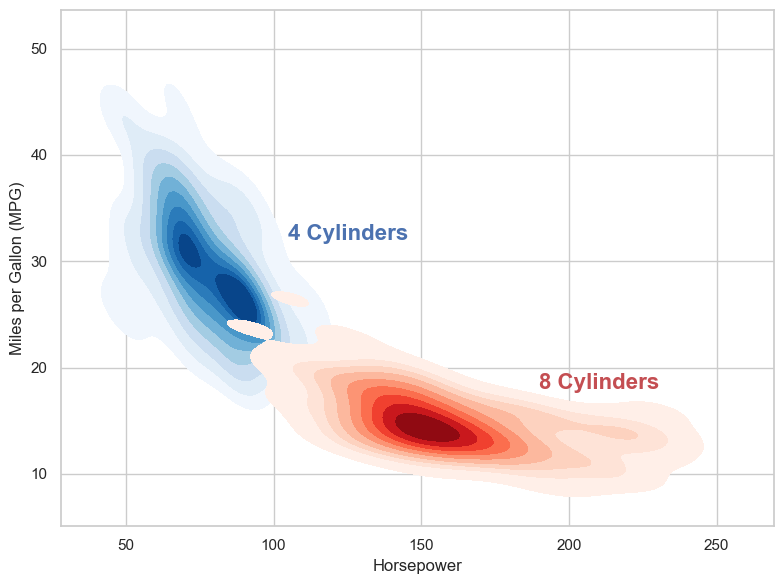

In [39]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x = cyl_4.horsepower, y = cyl_4.mpg,
            cmap="Blues", fill=True, thresh=0.05)
sns.kdeplot(x = cyl_8.horsepower, y = cyl_8.mpg,
            cmap="Reds", fill=True, thresh=0.05)

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')
plt.tight_layout()

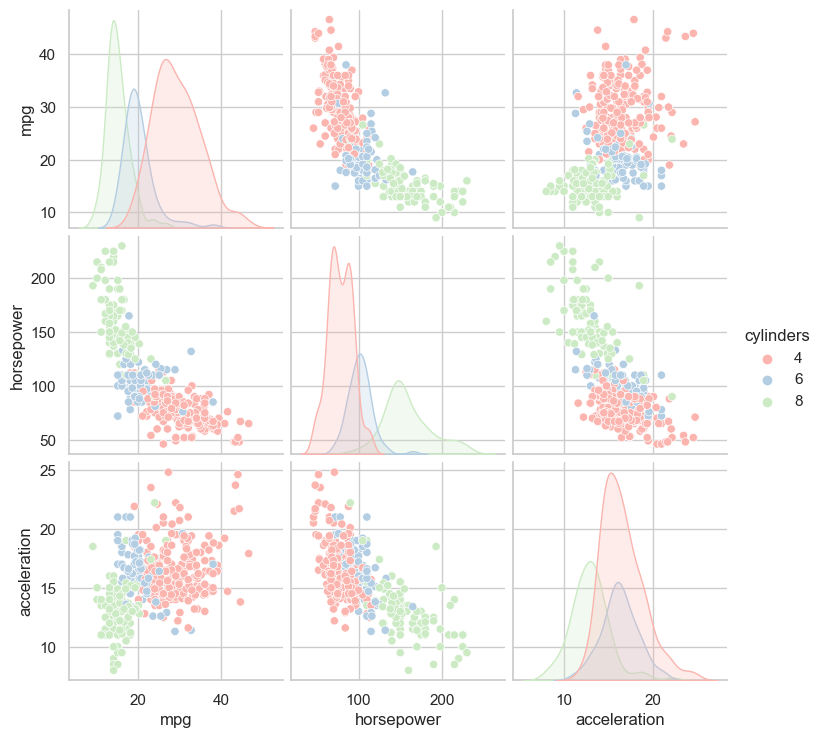

In [43]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='Pastel1'
            );

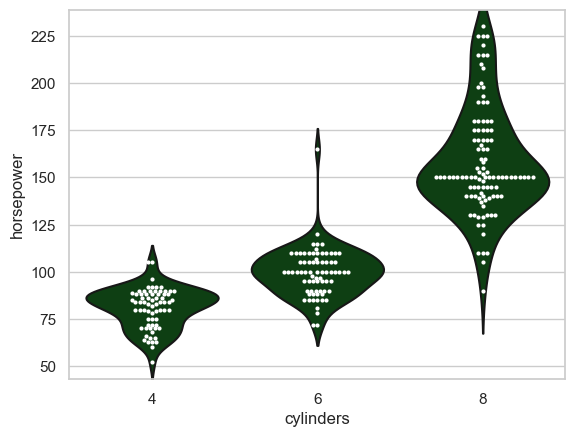

In [35]:
usa = cars[cars.origin == 'usa']

sns.violinplot(x=usa.cylinders, y=usa.horsepower,
               scale='width', inner=None, color='xkcd:forest green'
              )
sns.swarmplot(x=usa.cylinders, y=usa.horsepower,
              color='white', size=3
             );

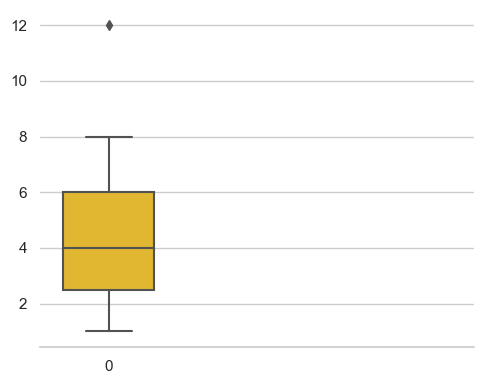

In [73]:
# sns.set_style('white')
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

plt.figure(figsize=(5,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=4)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

C:\Users\xdxd2\AppData\Local\Temp\ipykernel_33868\2887607254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.weight,


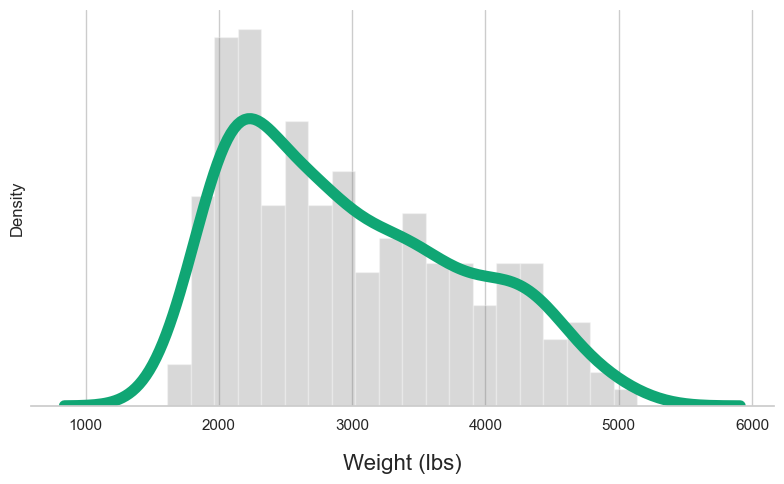

In [76]:
plt.figure(figsize=(8,5))
sns.distplot(cars.weight, 
             bins=20,
             kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
             hist_kws={'alpha': 0.3, 'color':'gray'}
            )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout();

C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\xdxd2\AppData\Local\Temp\ipykernel_33868\367797590.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 800x600 with 0 Axes>

C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


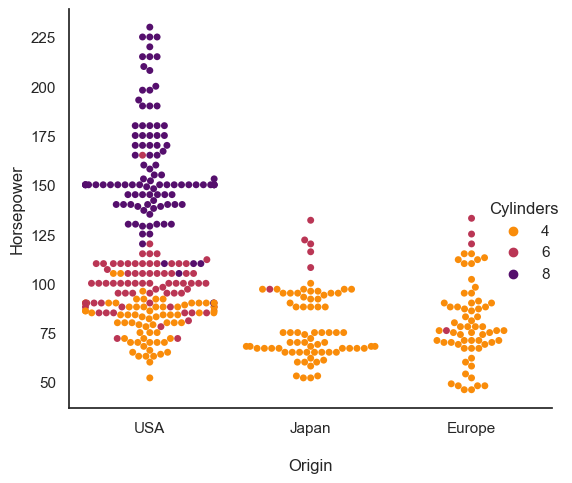

In [38]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='origin', y='horsepower', hue='cylinders', 
                kind='swarm', 
                palette=sns.color_palette('inferno_r', 3,),
                data=cars[cars.cylinders.isin([4, 6, 8])]
               )

plt.xlabel('\nOrigin')
plt.ylabel('Horsepower')
plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
g._legend.set_title('Cylinders')
plt.tight_layout();